In [1]:
#importing important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
#opening the new csv file for our data
df = pd.read_csv('./data/Clean_Aviation.csv')

**Is there any correlation between weather and accidents?
Weather that produces most accidents**

  Compare with damage
    
    #Aircraft_damage

    
  Compare with injuries
    
	#Total_Fatal_Injuries
	#Total_Serious_Injuries
	#Total_Minor_Injuries
	#Total_Uninjured
    
    #Injury_severity

In [3]:
df.columns

Index(['Event_Id', 'Accident_Number', 'Event_Date', 'Location', 'Country',
       'Injury_Severity', 'Aircraft_Damage', 'Make', 'Model',
       'Number_of_Engines', 'Engine_Type', 'Purpose_of_flight',
       'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition',
       'Phase_of_Flight', 'Report_Status', 'Make_Model'],
      dtype='object')

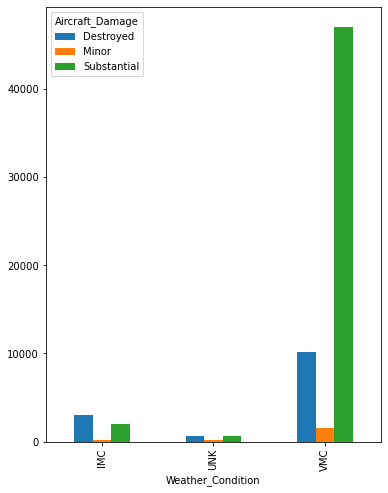

In [4]:
Weather_v_Damage = df[['Weather_Condition', 'Aircraft_Damage']]

Weather_v_Damage_count = Weather_v_Damage.value_counts()
Weather_v_Damage_count = Weather_v_Damage_count.unstack(level = 1)

Weather_v_Damage_count.drop(columns=['Unknown']).plot(kind='bar', figsize=(6,8),use_index = True)

df['Total_Injuries'] = df['Total_Fatal_Injuries'] + df['Total_Minor_Injuries'] + df['Total_Serious_Injuries'] 
df['Total_Passengers'] = df['Total_Injuries'] + df['Total_Uninjured']

new_col = df['Weather_Condition'].value_counts().values
Weather_v_Injuries = df.groupby('Weather_Condition')[['Total_Injuries', 'Total_Uninjured']].sum()
Weather_v_Injuries['Number_of_Accidents'] = new_col
Weather_v_Injuries['Injuries_per_Accident'] = Weather_v_Injuries['Total_Injuries'] / Weather_v_Injuries['Number_of_Accidents']
Weather_v_Injuries['Uninjuried_per_Accident'] = Weather_v_Injuries['Total_Uninjured'] / Weather_v_Injuries['Number_of_Accidents']

Weather_Injuries = Weather_v_Injuries[['Total_Injuries', 'Total_Uninjured']]
Weather_rate = Weather_v_Injuries[['Injuries_per_Accident','Uninjuried_per_Accident']].reset_index()

<AxesSubplot:xlabel='Weather_Condition'>

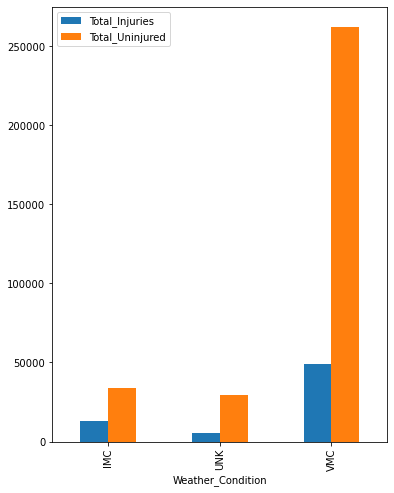

In [5]:
Weather_Injuries.plot(kind='bar', figsize=(6,8),use_index = True)

Obeservations:
	Clarify VMC and IMC
	most accidents happen with VMC

**Is there a correlation between engine type and accidents? Do accidents decrease with a certain engine type?**
	
    -Engine Type

	#Amateur_Built     - maybe drop ? filtering commercial, private,          
	#Number_of_Engines          
	#Engine_Type  


<AxesSubplot:xlabel='Engine_Type'>

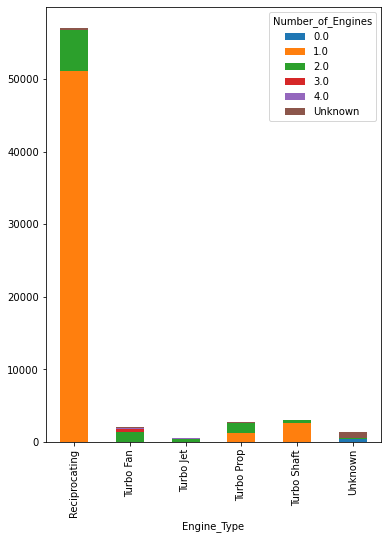

In [6]:
Engines = df.groupby(['Number_of_Engines', 'Engine_Type']).size().unstack(level = 0, fill_value = 0)
Engines.plot(kind='bar', stacked=True, figsize=(6,8), use_index = True)

Observations: 
	1 engine reciprocating or 1 engin
    
    

In [7]:
top_makes = df['Make'].value_counts()[:20]

make_df = df[df['Make'].isin(top_makes.index)][['Make', 'Total_Injuries', 'Total_Passengers']]

make_df = df.groupby(['Make','Engine_Type'])[ 'Total_Injuries', 'Total_Passengers'].sum().nlargest(20, columns=['Total_Injuries', 'Total_Passengers'])

make_df['Survival_Rate'] = 1 - (make_df['Total_Injuries']/ make_df['Total_Passengers'])
make_df = make_df.drop(columns= ['Total_Injuries', 'Total_Passengers'])
make_df = make_df.unstack(fill_value=0)
make_df.head()

<ipython-input-7-4354b97b99f3>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  make_df = df.groupby(['Make','Engine_Type'])[ 'Total_Injuries', 'Total_Passengers'].sum().nlargest(20, columns=['Total_Injuries', 'Total_Passengers'])


Survival_Rate                                                     
Engine_Type Reciprocating Turbo Fan Turbo Jet Turbo Prop Turbo Shaft   Unknown
Make                                                                          
Cessna           0.633670  0.000000  0.000000   0.637959    0.000000  0.350291
Piper            0.576463  0.000000  0.000000   0.000000    0.000000  0.000000
Boeing           0.000000  0.962465  0.974429   0.000000    0.000000  0.715648
Beech            0.518549  0.000000  0.000000   0.763518    0.000000  0.000000
Bell             0.588181  0.000000  0.000000   0.000000    0.504787  0.000000

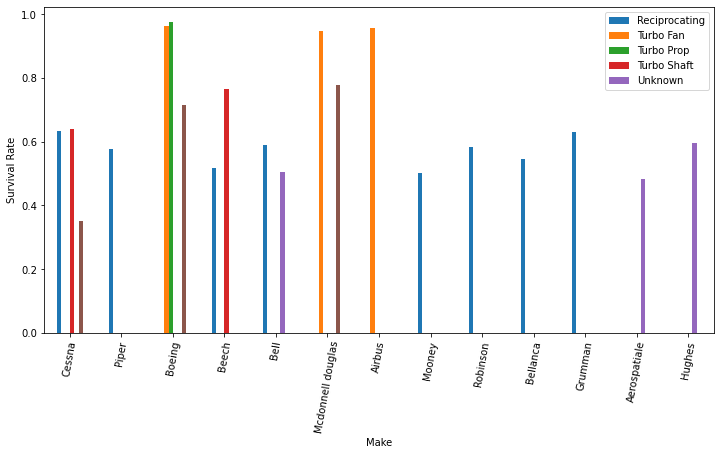

In [8]:
fig, ax = plt.subplots()

make_df.plot(kind='bar', rot=80, figsize=(12,6), ax =ax)
ax.legend(['Reciprocating',
'Turbo Fan',
'Turbo Prop',
'Turbo Shaft',
'Unknown'])
ax.set_ylabel('Survival Rate');

Observations: 
    reaffirms reciprocating most common engine type
    airbus and boeing - passenger aircraft manufacturers have turbo fan engines
    

In [9]:
df[['Make_Model','Engine_Type']].value_counts()[:20]

Make_Model       Engine_Type  
Cessna 152       Reciprocating    2322
Cessna 172       Reciprocating    1614
Cessna 172N      Reciprocating    1136
Piper PA-28-140  Reciprocating     893
Cessna 150       Reciprocating     787
Cessna 172M      Reciprocating     772
Cessna 172P      Reciprocating     674
Cessna 180       Reciprocating     605
Cessna 182       Reciprocating     590
Cessna 150M      Reciprocating     580
Piper PA-18      Reciprocating     565
Piper PA-28-180  Reciprocating     561
Piper PA-18-150  Reciprocating     560
Piper PA-28-161  Reciprocating     550
Piper PA-28-181  Reciprocating     512
Bell 206B        Turbo Shaft       473
Piper PA-38-112  Reciprocating     459
Cessna 150L      Reciprocating     450
Cessna 140       Reciprocating     388
Cessna 170B      Reciprocating     381
dtype: int64

Most of the top crashes are related with a planes with reciprocating engine. Only the model Bell 206B has a turbo shaft engine

In [10]:
top_models = df[['Make_Model']].value_counts()[:20]

model_df = df[df['Make_Model'].isin(top_models.index)][['Make', 'Total_Injuries', 'Total_Passengers']]
model_df

model_df = make_df = df.groupby(['Make_Model'])[ 'Total_Injuries', 'Total_Passengers'].sum().nlargest(20, 
    columns=['Total_Injuries', 'Total_Passengers'])
model_df

model_df['Survival_Rate'] = 1 - (model_df['Total_Injuries']/ model_df['Total_Passengers'])
model_df = model_df.drop(columns= ['Total_Injuries', 'Total_Passengers'])
model_df

#injury rate 
#injury:Survival ratio

<ipython-input-10-0ed0411f02f3>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  model_df = make_df = df.groupby(['Make_Model'])[ 'Total_Injuries', 'Total_Passengers'].sum().nlargest(20,


,Survival_Rate
Make_Model,
Cessna 152,0.705971
Piper PA-28-140,0.460407
Cessna 172N,0.589168
Cessna 172,0.703788
Piper PA-28-181,0.488336
Cessna 172M,0.598113
Piper PA-28-180,0.495791
Bell 206B,0.494253
Cessna 172P,0.610231


<ipython-input-11-696659c4ee36>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(model_df.index, rotation=80)


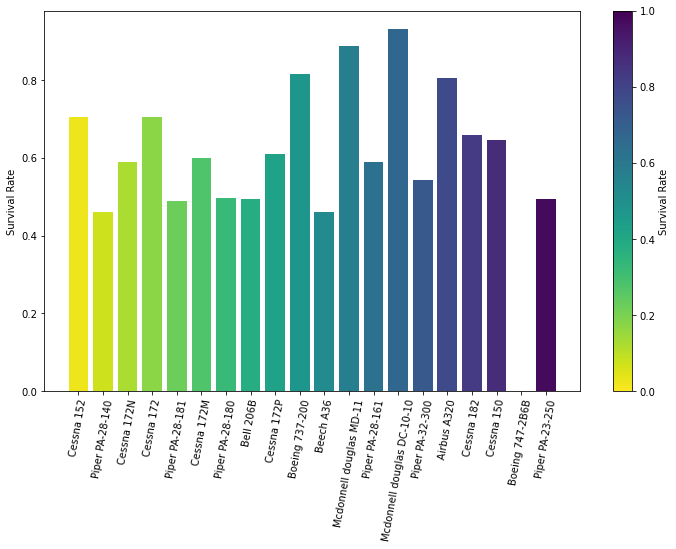

In [11]:
fig, ax = plt.subplots(figsize=(12,7))

color_map = plt.cm.viridis_r
bin_edges = np.linspace(0,1, len(model_df) + 1)
colors = [color_map((bin_edges[i] + bin_edges[i+1])/2) for i in range(len(model_df))]

# model_df.plot(kind='bar', rot=80, figsize=(12,6), ax =ax,legend=False, color =colors)
# ax.set_ylabel('Survival Rate');

for index, (make, row) in enumerate(model_df.iterrows()):
    color = colors[index]
    ax.bar(make, row['Survival_Rate'], color = color)

ax.set_xticklabels(model_df.index, rotation=80)
ax.set_ylabel('Survival Rate')
sm = plt.cm.ScalarMappable(cmap = color_map, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Survival Rate')

Observations: 
	survival rate v survival rate?
   